# Quantifying the World - Fall 2021
## Case Study 3 | Spam 
## Grant Bourzikas

## Abstract
The problem that has been brought to our data science team comes from the cybersecurity community and the problem is a direct result of more then 50% of all of breaches in the world.  These breaches are a results of attackers sending spam, spam with malware, and fraudulent emails that have menaced the industry for the last 25 years. The goal of the study is to parse a batch of email and utilize various machine learning techniques like vectorization, clustering, and naïve bayes to predict whether the email message is spam.   The messages are already classified as spam or not spam and represent the independent variable (y).  However, the mail message will need to be parsed and analyzed to determine if the message is actually spam by leverageing a series of data sciecne techniques that are outlined further in the paper.

After reviewing the results of the algorithms, there are two different models we would use depending on the use case.  Using KNeighbors Classifier, we were able to predict at a 99% accuracy score which is extremely good, however, if you extrapolated out billions of email, 99% may not be the best operational model to use for spam because missing 1% of email is still million of emails that will not be captured as spam.  Instead, we would select the Naïve Bayes model using the TDIDF vectorization even though the accuracy score is 94%.   The reason for selecting this mode is because the model can be updated dynamically using features such as fit prior which allows the model to learn as it gets new data, class prior which allows to set prior probabilities, feature count which allows to weight the new samples, and feature log probability for empirical log probability of the features in the class.  We believe this is the best operational model, but if this was for a Kaggle type competition, we would select the static KNeighborsClassifier model.


## Exploratory Data Analysis
After analyzing the emails structures, the files have been distributed into five categories: easy_ham, easy_ham2, hard_ham, spam, and spam_2.  These emails were read a into a python list and the full email was capture in the simple data structure.  The email header data and all HTML code was stripped from the email message in the list to prepare for the vectorization and modeling. The following is sample output from an email and the number of email Analyzed.


In [440]:
print("Sample of An Email:\n", corpus[0])
print("\nNumber of Emals:", len(corpus))


Sample of An Email:
 Dear Homeowner, Interest Rates are at their lowest point in 40 years! We help you find the best rate for your situation by matching your needs with hundreds of lenders! Home Improvement, Refinance, Second Mortgage, Home Equity Loans, and More! Even with less than perfect credit! This service is 100% FREE to home owners and new home buyers without any obligation. Just fill out a quick, simple form and jump-start your future plans today! Visit http://61.145.116.186/user0201/index.asp?Afft=QM10 To unsubscribe, please visit: http://61.145.116.186/light/watch.asp

Number of Emals: 9354


The last step was to Bunch the data into a dictionary then split this data into dependent (Email Message) and independent (Spam) variables and split the data into a training and test utilize a 1/5th  test split.  

## Bag of Words
Reviewing the email, it was determined the best approach was to use a Bag of Words (BOW)  which is a Natural Language Processing (NLP) capability for Text Classification.   For the problem, a simple BOW tokeknizer was used that eliminated stop words, non-breaking spaces, and converted all letters to lowercase.

To test the BOW,  the CountVectorizer was use which will count all the words in all the email messages and provide a summary of the most common words to ensuring the parsing of the message and BOW parameters are correct.  Many configurations were used in testing, but the best results leveraged these parameters. 

As you see the data below, the CountVectorizer was tested and worked with the = parameter tuning.

In [441]:
bow_TopWords.head(10)

,Word,Frequency
0,",",117619
1,--,103896
2,-- --,87854
3,>,72818
4,*,38521
5,* *,29772
6,> >,26654
7,),23664
8,(,22288
9,http,22268


While the top words in the BOW frequency are not words, these will be elimated based on the vectorizatoin parameter tuning to elimiate the low (2%) and high frequency (90%) and words.

## Models
After the exploratory data analysis and the BOW was performed, we developed 4 algorithms for the Spam dataset  that leveraged the TfidfVectorizer.  The parameters within Vectorizer utilized the BOW, set minimum and maximum of 2% and 90%, respectively, and leveraged a unigram that joined two words in sequence.  The following are the 4 models that were used:

### Model 1
K  Neighbors Classifier  used the classification to predict spam focused on optimizing the N Nearest Neighbors that will vote for the class.  We were able to predict at an accuracy score of 99% if email is spam or not spam.  The algorithm was optimized use n_neighbors = 2


In [442]:
display(Knn_Value_DF_Man)

,KNN,Score
0,2,0.992249
1,3,0.958974
2,4,0.953094
3,5,0.886008
4,6,0.881465
5,7,0.862355
6,8,0.858346
7,9,0.834558
8,10,0.831886
9,12,0.814914


### Model 2
DBScan used classification to predict spam focused on optimizing EPS to determine how close the point should be to each other.  We were able to optize the EPS  to a setting of 1.0 which created 5 clusters. However, the optimal number of clusters should be 2, for spam and not spa.  


In [443]:
display(eps_Value_DF_Man)

,EPS,Max,Value Counts
0,0.50,92,-1 5028 0 1221 4 163 1 10...
1,0.55,93,-1 4793 0 1524 1 105 15 8...
2,0.60,88,-1 4544 0 1767 14 130 3 7...
3,0.65,88,-1 4257 0 1927 15 150 26 8...
4,0.70,92,-1 3899 0 2286 4 179 15 17...
5,0.75,94,-1 3409 1 2617 2 339 11 29...
6,0.80,87,1 3410 -1 2930 9 330 11 6...
7,0.85,77,1 3858 -1 2502 9 344 11 6...
8,0.90,65,0 4712 -1 2018 10 66 9 6...
9,0.95,50,0 5315 -1 1604 6 66 3 5...


### Model 3
KMeans Classifier used to predict spam focused on optimizing the optimal number of clusters resulting in the highest accuracy score. We were able to optize the number of clusters which the model stated it was 1 at 74%; However, the optimal number of clusters should be 2; therefore, for spam and not spa should not be 1 is not realistic


In [444]:
display(KMeans_result)      

[{'KMeans': 1, 'Score': 0.7490311372444207},
 {'KMeans': 2, 'Score': 0.6513430442335961},
 {'KMeans': 3, 'Score': 0.13751169317118803},
 {'KMeans': 4, 'Score': 0.16397166911666444},
 {'KMeans': 5, 'Score': 0.1829480155018041},
 {'KMeans': 6, 'Score': 0.2477615929440064},
 {'KMeans': 7, 'Score': 0.04169450755044768},
 {'KMeans': 8, 'Score': 0.13510624081250835},
 {'KMeans': 9, 'Score': 0.04102632633970333},
 {'KMeans': 10, 'Score': 0.025257249766136577},
 {'KMeans': 11, 'Score': 0.13724442068689027},
 {'KMeans': 12, 'Score': 0.12361352398770546},
 {'KMeans': 15, 'Score': 0.05666176667112121},
 {'KMeans': 17, 'Score': 0.0511826807430175},
 {'KMeans': 20, 'Score': 0.03367633302151544}]

### Model 4
Naïve Bayes was used as the classifier to predict spam which leverages Bayes algorithm with 2 different types of vectorizers: CountVectorizers and TfidfVectorizer.

#### Model 4 with CountVectorizers
Using the CountVectorizers as the tokenizer, we were able to predict at a 94% accuracy. 


In [445]:
print(MultinomialNB_Count_CM)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1383
           1       0.87      0.92      0.89       488

    accuracy                           0.94      1871
   macro avg       0.92      0.94      0.93      1871
weighted avg       0.94      0.94      0.94      1871



In [446]:
# Cited from https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/\

Reviewing the Confusion Matrix, the key items are as follow:
- 439 - True Positive (TP): These are cases in which we predicted yes (they have be Spam), and they do have the disease.
- 1327 - True Negative (TN): We predicted no, and they aren’t Spam.
- 23 - False Positive (FP): We predicted yes, but they aren’t Spam. (Type I error)
- 82 - False Negatives (FN): We predicted no, but they are Spam. (Type II error)

This means that the prediction did not work on the 23 False Positives and 82 False Negatives which results in the 94% accuracy score.


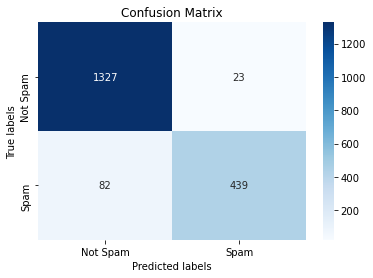

In [447]:

from sklearn.metrics import confusion_matrix
import seaborn as sns 
ax= plt.subplot()

MultinomialNB_Count_Confusion = confusion_matrix(y_test, test_preds)
sns.heatmap(cm0, cmap="Blues", annot=True, fmt='d', ) # for decimal

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

#### Model 4 with TfidfVectorizer
Using the TfidfVectorizer as the tokenizer, we were able to predict at a 94% accuracy, which was the same as the CountVectorizers. 


In [448]:
print(MultinomialNB_Vec_CM)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1409
           1       0.84      0.95      0.89       462

    accuracy                           0.94      1871
   macro avg       0.91      0.95      0.93      1871
weighted avg       0.95      0.94      0.94      1871



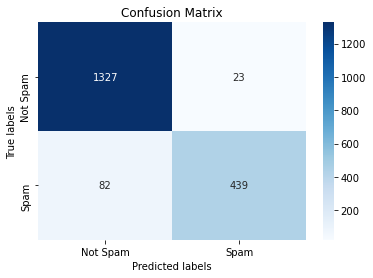

In [449]:
ax= plt.subplot()

MultinomialNB_Vec_Confusion = confusion_matrix(y_test, tfidf_preds)
sns.heatmap(cm0, cmap="Blues", annot=True, fmt='d', ) # for decimal

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

Reviewing the Confusion Matrix, the key items are as follow:
- 439 - True Positive (TP): These are cases in which we predicted yes (they have be Spam), and they do have the disease.
- 1327 - True Negative (TN): We predicted no, and they aren’t Spam.
- 23 - False Positive (FP): We predicted yes, but they aren’t Spam. (Type I error)
- 82 - False Negatives (FN): We predicted no, but they are Spam. (Type II error)

This means that the prediction did not work on the 23 False Positives and 82 False Negatives which results in the 94% accuracy score.

The interesting data comparision between the Count Vectorizer and the TfidfVectorizer for MultinomialNB, is that both vectorizers scored exactly the same. However, we do believe the TfidfVectorizer is the better algorithm for long-term success.


### Conclusion
After reviewing the results of the algorithms, there are two different models we would use depending on the use case.  Using KNeighbors Classifier, we were able to predict at a 99% accuracy score which is extremely good, however, if you extrapolated out billions of email, 99% may not be the best operational model to use for spam because missing 1% of email is still million of emails that will not be captured as spam.  Instead, we would select the Naïve Bayes model using the TDIDF vectorization even though the accuracy score is 94%.   The reason for selecting this mode is because the model can be updated dynamically using features such as fit prior which allows the model to learn as it gets new data, class prior which allows to set prior probabilities, feature count which allows to weight the new samples, and feature log probability for empirical log probability of the features in the class.  We believe this is the best operational model, but if this was for a Kaggle type competition, we would select the static KNeighborsClassifier model.

In [413]:
# Start Code

In [298]:
import pandas as pd

In [299]:
import os

path_to_emails = "messages/"
files = [x for x in os.walk("messages/")]

theme = []
email_id = []
corpus_orignal = []

for file_ in files[1:]:
    for email in file_[2]:
        with open(os.path.join(file_[0], email), "r",  encoding="latin1") as f:
            email_text = [i.strip() for i in f]
        
        theme.append(file_[0].split("/")[-1])
        email_id.append(email)
        corpus_orignal.append(email_text)
    
pd.DataFrame({"theme": theme, "email_id": email_id, "email_text": corpus_orignal}).head()

,theme,email_id,email_text
0,spam,00249.5f45607c1bffe89f60ba1ec9f878039a,[From pamela4701@eudoramail.com Mon Sep 9 10...
1,spam,0355.94ebf637e4bd3db8a81c8ce68ecf681d,[From 102192086381143-17090200005-example.com?...
2,spam,0395.bb934e8b4c39d5eab38f828a26f760b4,"[From sh@insiq.us Fri Sep 20 11:41:16 2002, R..."
3,spam,0485.9021367278833179285091e5201f5854,[From OWNER-NOLIST-SGODAILY*JM**NETNOTEINC*-CO...
4,spam,00373.ebe8670ac56b04125c25100a36ab0510,[From apf@wu-wien.ac.at Thu Sep 19 13:01:55 2...


In [300]:
df = pd.DataFrame({"theme": theme, "email_id": email_id, "email_text": corpus_orignal})

In [301]:
df.shape
# df.email_text[0] 
df.theme.value_counts()

easy_ham      5052
easy_ham_2    1402
spam_2        1398
spam          1001
hard_ham       501
Name: theme, dtype: int64

In [302]:
def stripHeader(text, key="", exact=True):
    tmp=[]
    flag = False
    for i, line_ in enumerate(text):
        if exact:
            if line_==key:
                flag = True
        else:
            if key in line_:
                flag=True
        if flag == True:
            tmp = text[i+1:]
            break
    
    #Return entire body if nothing matches
    if flag==False:
        tmp = text
    return tmp

def strinHeaderByBlankRow(text):
    return stripHeader(text, key="")

# Strip Header (Slater Code)
corpus = list(map(strinHeaderByBlankRow, corpus_orignal))

def stripHeaderByContentTransferEncoding(text):
    return stripHeader(text, key="Content-Transfer-Encoding", exact=False)

corpus = list(map(stripHeaderByContentTransferEncoding, corpus))

# Remove empty lines
corpus = [[ text_line for text_line in email if len(text_line) > 0] for email in corpus] 

In [304]:
from multiprocessing import Pool
from tqdm import tqdm
from html.parser import HTMLParser
from bs4 import BeautifulSoup

def stripHtml(text):
    text_combined = "\n".join(text)
    text_parsed = BeautifulSoup(text_combined, 'html.parser')
    text_cleaned = text_parsed.text.split("\n")
    return text_cleaned

with Pool() as p:
#     corpus = list(tqdm(p.imap(stripHtml, corpus), total=len(corpus)))
    corpus = list(map(stripHtml, corpus))

# Remove empty lines
corpus = [[ text_line for text_line in email if len(text_line) > 0] for email in corpus] 

/opt/miniconda3/envs/Grant_Base/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "http://www.post-gazette.com/columnists/20020905brian5.asp" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [305]:
# Strip Content-Transfer-Encoding 1 more time to get rid of text / html combined content
corpus = list(map(stripHeaderByContentTransferEncoding, corpus))

# Combine lines
corpus = [" ".join(text) for text in corpus]

In [306]:
corpus[0]

'Dear Homeowner, Interest Rates are at their lowest point in 40 years! We help you find the best rate for your situation by matching your needs with hundreds of lenders! Home Improvement, Refinance, Second Mortgage, Home Equity Loans, and More! Even with less than perfect credit! This service is 100% FREE to home owners and new home buyers without any obligation. Just fill out a quick, simple form and jump-start your future plans today! Visit http://61.145.116.186/user0201/index.asp?Afft=QM10 To unsubscribe, please visit: http://61.145.116.186/light/watch.asp'

In [307]:
len(corpus)


9354

# Create Bag of Words

In [308]:
# Remove Stop Words
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

stop_words = stopwords.words("english") # take out small non meanful words

stop_words.extend([
    "\xa0" # breaking space
])

def tokenizer(text):
    text = text.lower() make text lower
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
#     tokens = [word for word in tokens if word not in stop_words and word.isalpha()] # doesnot work well

    return tokens    

In [310]:
import numpy as np
df_Corpus = pd.Da1taFrame({"text": corpus})

y = [1 if t in ["spam", "spam_2"] else 0 for t in theme]
len(y)

df_Corpus['target'] = y
# df_Corpus.target.iloc[0:6453] = 0
# df_Corpus.target.iloc[6453:9354] = 1
# Lookup Value
# easy_ham      5052
# easy_ham_2    1402
# spam_2        1398
# spam          1001
# hard_ham       501

df_Corpus.tail()
df_Corpus.target.value_counts()

0    6955
1    2399
Name: target, dtype: int64

In [311]:
# Test / Train Splits

In [312]:
# Split Data - 20%

In [313]:
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split
X = df_Corpus.iloc[:,:-1]
y = df_Corpus.iloc[:,-1]
y = y.astype('int')

y = y.astype('int')
bunched_Corpus = Bunch(data=corpus, target=y)
X = bunched_Corpus['data']
y = bunched_Corpus['target']
y = y.astype('int')


y = y.astype('int')


# y = [1 if t in ["spam", "spam_2"] else 0 for t in theme]
# len(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=76)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

7483
1871
7483
1871


In [314]:
# Count Vectorizer

In [315]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = tokenizer, min_df = .02, max_df = .9, ngram_range=(1,2)) # Min/Max Biwords
X = vectorizer.fit_transform(corpus)

In [368]:
vectorizer.vocabulary_



{'dear': 519,
 ',': 57,
 'interest': 750,
 'rates': 1063,
 'lowest': 842,
 'point': 1010,
 '40': 232,
 'years': 1423,
 '!': 0,
 'help': 699,
 'find': 618,
 'best': 401,
 'rate': 1062,
 'situation': 1194,
 'needs': 924,
 'hundreds': 720,
 'home': 705,
 'second': 1144,
 'even': 576,
 'less': 789,
 'credit': 504,
 'service': 1169,
 '100': 202,
 '%': 14,
 'free': 639,
 'new': 929,
 'without': 1393,
 'fill': 615,
 'quick': 1054,
 'simple': 1188,
 'form': 632,
 'future': 648,
 'today': 1292,
 'visit': 1357,
 'http': 714,
 '?': 289,
 'unsubscribe': 1326,
 'please': 1005,
 '100 %': 203,
 'today !': 1293,
 'http :': 715,
 ', please': 94,
 'please visit': 1007,
 ': http': 263,
 "'s": 35,
 'copy': 490,
 'files': 614,
 'software': 1199,
 'music': 907,
 '(': 38,
 'data': 510,
 ')': 42,
 'protect': 1043,
 'cd': 433,
 'game': 649,
 'really': 1075,
 'work': 1399,
 '$': 13,
 'worth': 1407,
 'purchase': 1049,
 'right': 1119,
 '50': 235,
 'details': 526,
 'order': 964,
 'take': 1255,
 'privacy': 1029,
 '

In [386]:
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
a = sorted(words_freq, key=lambda x: x[1], reverse=True)
bow_TopWords = pd.DataFrame(a)
bow_TopWords = bow_TopWords.rename(columns={0: 'Word', 1: 'Frequency'})
bow_TopWords.head(20)

,Word,Frequency
0,",",117619
1,--,103896
2,-- --,87854
3,>,72818
4,*,38521
5,* *,29772
6,> >,26654
7,),23664
8,(,22288
9,http,22268


In [358]:
from  sklearn.feature_extraction.text import TfidfVectorizer
tf_vectors = TfidfVectorizer(tokenizer = tokenizer, min_df = .02, max_df = .9, ngram_range=(1,2))
new_vectors = tf_vectors.fit_transform(X_train)

In [359]:
new_vectors.shape

(7483, 1434)

In [360]:
new_vectors

<7483x1434 sparse matrix of type '<class 'numpy.float64'>'
	with 589967 stored elements in Compressed Sparse Row format>

In [321]:
# KNN

In [322]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [323]:
knn.fit(new_vectors, y_train)

KNeighborsClassifier()

In [324]:
preds = knn.predict(new_vectors)

In [325]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, preds)

0.8860082854470133

In [326]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(new_vectors, y_train)
preds = knn.predict(new_vectors)
accuracy_score(y_train, preds)

0.8318856073767206

In [327]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(new_vectors, y_train)
preds = knn.predict(new_vectors)
accuracy_score(y_train, preds)

0.9589736736602966

In [328]:
knn_Options = [2,3,4,5,6,7,8,9,10,12,15]

knn_result = []

for i in knn_Options:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(new_vectors, y_train)
    preds = knn.predict(new_vectors)
    out = accuracy_score(y_train, preds)
    print(i, out)
    knn_result.append({
        'KNN': i,
        'Score': out,
    })

Knn_Value_DF_Man = pd.DataFrame(knn_result)
Knn_Value_DF_Man.to_csv('Knn_Value_DF_Man.csv')
display(Knn_Value_DF_Man)  

2 0.9922490979553655
3 0.9589736736602966
4 0.9530936790057464
5 0.8860082854470133
6 0.8814646532139516
7 0.8623546705866632
8 0.858345583322197
9 0.834558332219698
10 0.8318856073767206
12 0.814913804623814
15 0.7919283709742082


,KNN,Score
0,2,0.992249
1,3,0.958974
2,4,0.953094
3,5,0.886008
4,6,0.881465
5,7,0.862355
6,8,0.858346
7,9,0.834558
8,10,0.831886
9,12,0.814914


In [381]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(new_vectors, y_train)
preds = knn.predict(new_vectors)
# accuracy_score(y_train, preds)



In [385]:
from sklearn.metrics import classification_report
print(classification_report(preds, y_train))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5663
           1       0.97      1.00      0.98      1820

    accuracy                           0.99      7483
   macro avg       0.98      0.99      0.99      7483
weighted avg       0.99      0.99      0.99      7483



In [329]:
# DB Scan

In [330]:
from sklearn.cluster import DBSCAN

In [331]:
db = DBSCAN(eps=0.5, min_samples=5)
preds = db.fit_predict(new_vectors) # Distance is too Far with -1 - This is an outlier
x = pd.DataFrame(preds)
x[0].value_counts()

-1     5028
 0     1221
 4      163
 1      105
 15      71
       ... 
 57       5
 42       5
 55       5
 45       5
 90       5
Name: 0, Length: 94, dtype: int64

In [415]:
eps_Options = [0.5, .55, .60, .65, .7, .75, .8, .85, .9, .95, 1.0, 1.05, 1.1]
eps_result = []

for i in eps_Options:
    db = DBSCAN(eps=i, min_samples=5)
    preds = db.fit_predict(new_vectors)
    x_Max = max(preds)
    x = pd.DataFrame(preds)
    x_Out = x[0].value_counts()
    print(i, x_Max)
    eps_result.append({
        'EPS': i,
        'Max': x_Max,
        'Value Counts': x_Out,
    })

eps_Value_DF_Man = pd.DataFrame(eps_result)
eps_Value_DF_Man.to_csv('eps_Value_DF_Man.csv')
display(eps_Value_DF_Man)      
    
    

0.5 92
0.55 93
0.6 88
0.65 88
0.7 92
0.75 94
0.8 87
0.85 77
0.9 65
0.95 50
1.0 5
1.05 0
1.1 0


,EPS,Max,Value Counts
0,0.50,92,-1 5028 0 1221 4 163 1 10...
1,0.55,93,-1 4793 0 1524 1 105 15 8...
2,0.60,88,-1 4544 0 1767 14 130 3 7...
3,0.65,88,-1 4257 0 1927 15 150 26 8...
4,0.70,92,-1 3899 0 2286 4 179 15 17...
5,0.75,94,-1 3409 1 2617 2 339 11 29...
6,0.80,87,1 3410 -1 2930 9 330 11 6...
7,0.85,77,1 3858 -1 2502 9 344 11 6...
8,0.90,65,0 4712 -1 2018 10 66 9 6...
9,0.95,50,0 5315 -1 1604 6 66 3 5...


In [333]:
# KMeans 

In [334]:
from sklearn.cluster import KMeans

In [389]:
KMeans_Options = [1,2,3,4,5,6,7,8,9,10,11,12,15,17, 20]
KMeans_result = []

for i in KMeans_Options:
    km = KMeans(n_clusters=i, tol=.0001, max_iter=300) # tol is how much center will move
    preds = km.fit_predict(new_vectors)
    out = accuracy_score(y_train, preds)
#     print(km.labels_)
    print(i, out)
    KMeans_result.append({
        'KMeans': i,
        'Score': out,
    })

display(KMeans_result)      


1 0.7490311372444207
2 0.6513430442335961
3 0.13751169317118803
4 0.16397166911666444
5 0.1829480155018041
6 0.2477615929440064
7 0.04169450755044768
8 0.13510624081250835
9 0.04102632633970333
10 0.025257249766136577
11 0.13724442068689027
12 0.12361352398770546
15 0.05666176667112121
17 0.0511826807430175
20 0.03367633302151544


[{'KMeans': 1, 'Score': 0.7490311372444207},
 {'KMeans': 2, 'Score': 0.6513430442335961},
 {'KMeans': 3, 'Score': 0.13751169317118803},
 {'KMeans': 4, 'Score': 0.16397166911666444},
 {'KMeans': 5, 'Score': 0.1829480155018041},
 {'KMeans': 6, 'Score': 0.2477615929440064},
 {'KMeans': 7, 'Score': 0.04169450755044768},
 {'KMeans': 8, 'Score': 0.13510624081250835},
 {'KMeans': 9, 'Score': 0.04102632633970333},
 {'KMeans': 10, 'Score': 0.025257249766136577},
 {'KMeans': 11, 'Score': 0.13724442068689027},
 {'KMeans': 12, 'Score': 0.12361352398770546},
 {'KMeans': 15, 'Score': 0.05666176667112121},
 {'KMeans': 17, 'Score': 0.0511826807430175},
 {'KMeans': 20, 'Score': 0.03367633302151544}]

In [390]:
display(knn_result)      


[{'KNN': 2, 'Score': 0.9922490979553655},
 {'KNN': 3, 'Score': 0.9589736736602966},
 {'KNN': 4, 'Score': 0.9530936790057464},
 {'KNN': 5, 'Score': 0.8860082854470133},
 {'KNN': 6, 'Score': 0.8814646532139516},
 {'KNN': 7, 'Score': 0.8623546705866632},
 {'KNN': 8, 'Score': 0.858345583322197},
 {'KNN': 9, 'Score': 0.834558332219698},
 {'KNN': 10, 'Score': 0.8318856073767206},
 {'KNN': 12, 'Score': 0.814913804623814},
 {'KNN': 15, 'Score': 0.7919283709742082},
 {'KMenas': 1, 'Score': 0.7490311372444207},
 {'KMenas': 2, 'Score': 0.3486569557664039},
 {'KMenas': 3, 'Score': 0.4093278097019912},
 {'KMenas': 4, 'Score': 0.3013497260457036},
 {'KMenas': 5, 'Score': 0.0315381531471335},
 {'KMenas': 6, 'Score': 0.09247627956701858},
 {'KMenas': 7, 'Score': 0.10984899104637177},
 {'KMenas': 8, 'Score': 0.14111987170920753},
 {'KMenas': 9, 'Score': 0.002405452358679674},
 {'KMenas': 10, 'Score': 0.045035413604169454},
 {'KMenas': 11, 'Score': 0.00521181344380596},
 {'KMenas': 12, 'Score': 0.092877

In [424]:
# Naive Bayes

In [425]:
cv = CountVectorizer(tokenizer = tokenizer, min_df = .02, max_df = .9, ngram_range=(1,2)) # Settting
tfidf = TfidfVectorizer(tokenizer = tokenizer, min_df = .02, max_df = .9, ngram_range=(1,2))


In [426]:
cv_data = cv.fit_transform(X_train) # Train
tf_data = tfidf.fit_transform(X_train) # Train


In [427]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=.01) # Check Alpha 
# # model = MultinomialNB(alpha=.01, fit_prior=True) # Check Alpha 
# model = MultinomialNB(alpha=.01, fit_prior=True, class_prior=[.06, .94]) # Check Alpha 


In [428]:
# Naive Bayes - Count Vectorizer

In [429]:
cv_test_data = cv.transform(X_test) # Use Test Data
model.fit(cv_data, y_train) # Use Train Data
test_preds = model.predict(cv_test_data) # Test

In [430]:
MultinomialNB_Count = accuracy_score(test_preds, y_test) # Test
MultinomialNB_Count

0.9428113308391235

In [431]:
from sklearn.metrics import classification_report

MultinomialNB_Count_CM = classification_report(test_preds, y_test)
print(MultinomialNB_Count_CM)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1383
           1       0.87      0.92      0.89       488

    accuracy                           0.94      1871
   macro avg       0.92      0.94      0.93      1871
weighted avg       0.94      0.94      0.94      1871



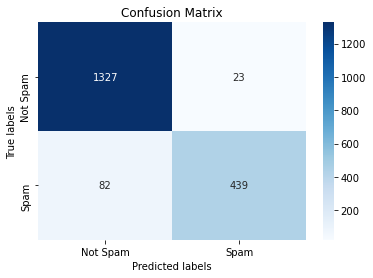

In [432]:

from sklearn.metrics import confusion_matrix
import seaborn as sns 
ax= plt.subplot()

MultinomialNB_Count_Confusion = confusion_matrix(y_test, test_preds)
sns.heatmap(cm0, cmap="Blues", annot=True, fmt='d', ) # for decimal

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);

In [433]:
# Naive Bayes - TFIDF Vectorizer

In [434]:
model.fit(tf_data, y_train)
tf_test_data = tfidf.transform(X_test)
tfidf_preds = model.predict(tf_test_data)

In [435]:
MultinomialNB_Vec = accuracy_score(tfidf_preds, y_test)
MultinomialNB_Vec_CM = classification_report(tfidf_preds, y_test)
print(MultinomialNB_Vec) # Train
print(MultinomialNB_Vec_CM)

0.9438802779262426
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1409
           1       0.84      0.95      0.89       462

    accuracy                           0.94      1871
   macro avg       0.91      0.95      0.93      1871
weighted avg       0.95      0.94      0.94      1871



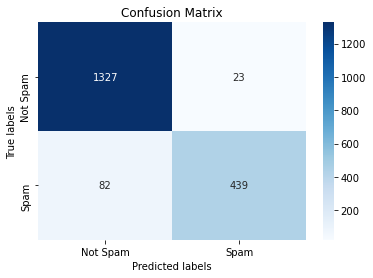

In [436]:

from sklearn.metrics import confusion_matrix
import seaborn as sns 
ax= plt.subplot()

MultinomialNB_Vec_Confusion = confusion_matrix(y_test, tfidf_preds)
sns.heatmap(cm0, cmap="Blues", annot=True, fmt='d', ) # for decimal

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);